<a href="https://colab.research.google.com/github/jeffheaton/t81_558_deep_learning/blob/master/t81_558_class_09_4_transfer_nlp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# T81-558: Applications of Deep Neural Networks
**Module 9: Transfer Learning**
* Instructor: [Jeff Heaton](https://sites.wustl.edu/jeffheaton/), McKelvey School of Engineering, [Washington University in St. Louis](https://engineering.wustl.edu/Programs/Pages/default.aspx)
* For more information visit the [class website](https://sites.wustl.edu/jeffheaton/t81-558/).

# Module 9 Material

* Part 9.1: Introduction to Keras Transfer Learning [[Video]](https://www.youtube.com/watch?v=WLlP6S-Z8Xs&list=PLjy4p-07OYzulelvJ5KVaT2pDlxivl_BN) [[Notebook]](t81_558_class_09_1_keras_transfer.ipynb)
* Part 9.2: Popular Pretrained Neural Networks for Keras [[Video]](https://www.youtube.com/watch?v=ctVA1_46YEE&list=PLjy4p-07OYzulelvJ5KVaT2pDlxivl_BN) [[Notebook]](t81_558_class_09_2_popular_transfer.ipynb)
* Part 9.3: Transfer Learning for Computer Vision and Keras [[Video]](https://www.youtube.com/watch?v=61vMUm_XBMI&list=PLjy4p-07OYzulelvJ5KVaT2pDlxivl_BN) [[Notebook]](t81_558_class_09_3_transfer_cv.ipynb)
* **Part 9.4: Transfer Learning for Languages and Keras** [[Video]](https://www.youtube.com/watch?v=ajmAAg9FxXA&list=PLjy4p-07OYzulelvJ5KVaT2pDlxivl_BN) [[Notebook]](t81_558_class_09_4_transfer_nlp.ipynb)
* Part 9.5: Transfer Learning for Keras Feature Engineering [[Video]](https://www.youtube.com/watch?v=Dttxsm8zpL8&list=PLjy4p-07OYzulelvJ5KVaT2pDlxivl_BN) [[Notebook]](t81_558_class_09_5_transfer_feature_eng.ipynb)

# Google CoLab Instructions

The following code ensures that Google CoLab is running the correct version of TensorFlow.

In [1]:
try:
    %tensorflow_version 2.x
    COLAB = True
    print("Note: using Google CoLab")
except:
    print("Note: not using Google CoLab")
    COLAB = False

Note: not using Google CoLab


# Part 9.4: Transfer Learning for Languages and Keras

You will commonly use transfer learning in conjunction with Natural Language Processing (NLP).  This course has an entire module that covers NLP.  However, we will look at how you can load a network into Keras for NLP via transfer learning.  The following three sources were helpful for the creation of this section.

* Universal sentence encoder [[Cite:cer2018universal]](https://arxiv.org/abs/1803.11175). arXiv preprint arXiv:1803.11175)
* Deep Transfer Learning for Natural Language Processing: Text Classification with Universal Embeddings [[Cite:howard2018universal]](https://towardsdatascience.com/deep-transfer-learning-for-natural-language-processing-text-classification-with-universal-1a2c69e5baa9)
* [Keras Tutorial: How to Use Google's Universal Sentence Encoder for Spam Classification](http://hunterheidenreich.com/blog/google-universal-sentence-encoder-in-keras/)

These examples make use of TensorFlow Hub, which allows pretrained models to be loaded into TensorFlow easily.  To install TensorHub use the following commands.

In [2]:
!pip install tensorflow_hub

It is also necessary to install TensorFlow Datasets, which you can install \with the following command.

In [3]:
!pip install tensorflow_datasets

  Created wheel for dill: filename=dill-0.3.2-py3-none-any.whl size=78977 sha256=c9ee55462820f4e66c44c76f46eb499453725a7339436b18eb0947153d0d2592
  Stored in directory: c:\users\jeffh\appdata\local\pip\cache\wheels\72\6b\d5\5548aa1b73b8c3d176ea13f9f92066b02e82141549d90e2100


ERROR: tensorflow-metadata 0.23.0 has requirement absl-py<0.9,>=0.7, but you'll have absl-py 0.9.0 which is incompatible.


  Created wheel for promise: filename=promise-2.3-py3-none-any.whl size=21499 sha256=e1f17d3a5a840906a2af17e7a80c4013d8cf29812f014a8ad6413bc21f126faa
  Stored in directory: c:\users\jeffh\appdata\local\pip\cache\wheels\29\93\c6\762e359f8cb6a5b69c72235d798804cae523bbe41c2aa8333d
Successfully built dill promise


Load the Internet Movie DataBase (IMDB) reviews data set. This example is based on a TensorFlow example that you can [find here](https://colab.research.google.com/github/tensorflow/hub/blob/master/examples/colab/tf2_text_classification.ipynb#scrollTo=2ew7HTbPpCJH).

In [4]:
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_datasets as tfds

train_data, test_data = tfds.load(name="imdb_reviews", 
                                  split=["train", "test"], 
                                  batch_size=-1, as_supervised=True)

train_examples, train_labels = tfds.as_numpy(train_data)
test_examples, test_labels = tfds.as_numpy(test_data)

# /Users/jheaton/tensorflow_datasets/imdb_reviews/plain_text/0.1.0

Shuffling and writing examples to C:\Users\jeffh\tensorflow_datasets\imdb_reviews\plain_text\1.0.0.incomplete7JB40W\imdb_reviews-train.tfrecord


Shuffling and writing examples to C:\Users\jeffh\tensorflow_datasets\imdb_reviews\plain_text\1.0.0.incomplete7JB40W\imdb_reviews-test.tfrecord


Shuffling and writing examples to C:\Users\jeffh\tensorflow_datasets\imdb_reviews\plain_text\1.0.0.incomplete7JB40W\imdb_reviews-unsupervised.tfrecord


Dataset imdb_reviews downloaded and prepared to C:\Users\jeffh\tensorflow_datasets\imdb_reviews\plain_text\1.0.0. Subsequent calls will reuse this data.


Load a pretrained embedding model called [gnews-swivel-20dim](https://tfhub.dev/google/tf2-preview/gnews-swivel-20dim/1).  This network was trained by Google on GNEWS data and can convert RAW text into vectors.  

In [5]:
model = "https://tfhub.dev/google/tf2-preview/gnews-swivel-20dim/1"
hub_layer = hub.KerasLayer(model, output_shape=[20], input_shape=[], 
                           dtype=tf.string, trainable=True)

Consider the following three movie reviews.

In [6]:
train_examples[:3]

array([b"This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it.",
       b'I have been known to fall asleep during films, but this is usually due to a combination of things including, really tired, being warm and comfortable on the sette and having just eaten a lot. However on this occasion I fell asleep because the film was rubbish. The plot 

The embedding layer can convert each to 20-number vectors.

In [7]:
hub_layer(train_examples[:3])

<tf.Tensor: shape=(3, 20), dtype=float32, numpy=
array([[ 1.765786  , -3.882232  ,  3.9134233 , -1.5557289 , -3.3362343 ,
        -1.7357955 , -1.9954445 ,  1.2989551 ,  5.081598  , -1.1041286 ,
        -2.0503852 , -0.72675157, -0.65675956,  0.24436149, -3.7208383 ,
         2.0954835 ,  2.2969332 , -2.0689783 , -2.9489717 , -1.1315987 ],
       [ 1.8804485 , -2.5852382 ,  3.4066997 ,  1.0982676 , -4.056685  ,
        -4.891284  , -2.785554  ,  1.3874227 ,  3.8476458 , -0.9256538 ,
        -1.896706  ,  1.2113281 ,  0.11474707,  0.76209456, -4.8791065 ,
         2.906149  ,  4.7087674 , -2.3652055 , -3.5015898 , -1.6390051 ],
       [ 0.71152234, -0.6353217 ,  1.7385626 , -1.1168286 , -0.5451594 ,
        -1.1808156 ,  0.09504455,  1.4653089 ,  0.66059524,  0.79308075,
        -2.2268345 ,  0.07446612, -1.4075904 , -0.70645386, -1.907037  ,
         1.4419787 ,  1.9551861 , -0.42660055, -2.8022065 ,  0.43727064]],
      dtype=float32)>

We add additional layers to attempt to classify the movie reviews as either positive or negative.

In [8]:
model = tf.keras.Sequential()
model.add(hub_layer)
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 20)                400020    
_________________________________________________________________
dense (Dense)                (None, 16)                336       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 400,373
Trainable params: 400,373
Non-trainable params: 0
_________________________________________________________________


Compile the neural network.

In [9]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

Split and train the neural network.

In [10]:
x_val = train_examples[:10000]
partial_x_train = train_examples[10000:]

y_val = train_labels[:10000]
partial_y_train = train_labels[10000:]

In [11]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=40,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=1)

Train on 15000 samples, validate on 10000 samples
Epoch 1/40
15000/15000 [==============================] - 3s 189us/sample - loss: 0.6388 - accuracy: 0.6433 - val_loss: 0.5910 - val_accuracy: 0.6937
Epoch 2/40
15000/15000 [==============================] - 2s 143us/sample - loss: 0.5626 - accuracy: 0.7191 - val_loss: 0.5495 - val_accuracy: 0.7295
Epoch 3/40
15000/15000 [==============================] - 2s 143us/sample - loss: 0.5173 - accuracy: 0.7573 - val_loss: 0.5138 - val_accuracy: 0.7585
Epoch 4/40
15000/15000 [==============================] - 2s 145us/sample - loss: 0.4774 - accuracy: 0.7839 - val_loss: 0.4809 - val_accuracy: 0.7832
Epoch 5/40
15000/15000 [==============================] - 2s 146us/sample - loss: 0.4393 - accuracy: 0.8106 - val_loss: 0.4546 - val_accuracy: 0.7973
Epoch 6/40
15000/15000 [==============================] - 2s 146us/sample - loss: 0.4038 - accuracy: 0.8305 - val_loss: 0.4239 - val_accuracy: 0.8155
Epoch 7/40
15000/15000 [==========================

Evaluate the neural network.

In [12]:
results = model.evaluate(test_data, test_labels)

print(results)

25000/25000 [==============================] - 4s 167us/sample - loss: 0.4406 - accuracy: 0.8523
[0.44060500403404235, 0.85228]


In [13]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

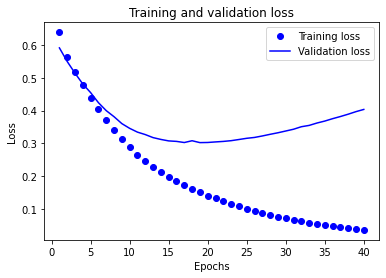

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

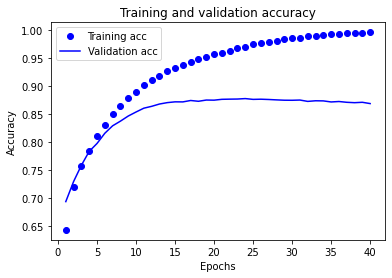

In [15]:
plt.clf()   # clear figure

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()